In [1]:
!pip install osmnx

In [2]:
import osmnx as ox
import folium
import geopandas as gpd

# Load GeoJSON file from Kaggle input directory
file_path = "/kaggle/input/goa-hospitals/GOA .geojson"
gdf = gpd.read_file(file_path)

# Create a Folium map centered at the location of Goa
map_hospitals_goa = folium.Map(location=[15.2993, 74.1240], zoom_start=11)

# Iterate over all hospital features and add them to the map with custom icons
for _, feature in gdf.iterrows():
    lat, lon = feature['geometry'].centroid.y, feature['geometry'].centroid.x
    name = feature['name'] if 'name' in feature else 'Hospital'
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(icon='hospital', color='blue')).add_to(map_hospitals_goa)

# Display the map in the Kaggle notebook
map_hospitals_goa


Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.
Skipping feature with unexpected coordinates format.


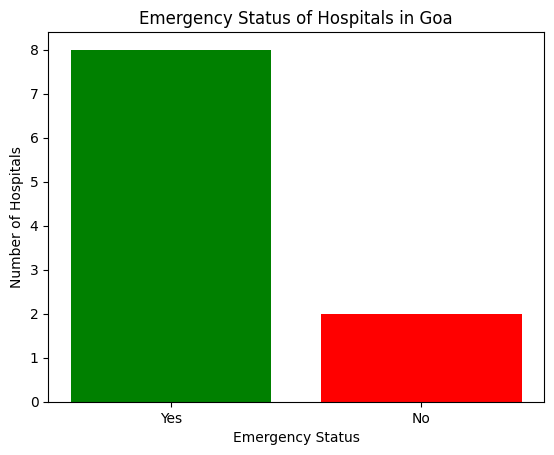

In [3]:
import folium
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load GeoJSON file with hospital data in Goa
geojson_file = '/kaggle/input/goa-hospitals/GOA .geojson'
with open(geojson_file) as f:
    geojson_data = json.load(f)

# Count the occurrences of each emergency status
emergency_counts = Counter(feature['properties'].get('emergency', 'unknown') for feature in geojson_data['features'])

# Create a Folium map centered at the location of Goa
map_hospitals_goa = folium.Map(location=[15.2993, 74.1240], zoom_start=11)

# Add GeoJSON data with a marker for each hospital
for feature in geojson_data['features']:
    # Extract coordinates from the polygon
    coordinates = feature['geometry']['coordinates'][0]

    # Check if the coordinates are in the expected format (list of coordinates)
    if isinstance(coordinates, list) and all(isinstance(coord, list) and len(coord) == 2 for coord in coordinates):
        # Calculate the centroid
        centroid = [
            sum(coord[1] for coord in coordinates) / len(coordinates),
            sum(coord[0] for coord in coordinates) / len(coordinates)
        ]

        name = feature['properties'].get('name', 'Hospital')

        # Extract data for the bar chart
        emergency_status = feature['properties'].get('emergency', 'unknown')

        folium.Marker(location=centroid, popup=name).add_to(map_hospitals_goa)
    else:
        # Log or handle the case where coordinates are not in the expected format
        print(f"Skipping feature with unexpected coordinates format.")

# Display the map in the Colab notebook
map_hospitals_goa

# Plot the bar chart
labels = ['Yes', 'No']
counts = [emergency_counts['yes'], emergency_counts['no']]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Emergency Status')
plt.ylabel('Number of Hospitals')
plt.title('Emergency Status of Hospitals in Goa')
plt.show()
